#Setup

In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [2]:
from google.colab import drive
import pandas as pd
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla V100-SXM2-16GB


In [4]:
!pip install nltk
!pip install wordcloud
!pip install emoji
!pip install googletrans==4.0.0-rc1

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 358.9/358.9 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55.1/55.1 kB 1.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.5/1.5 MB 11.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 133.4/133.4 kB 6.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58.8/58.8 kB 3.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.6/42.6 kB 3.9 MB/s eta 0:00

#Dataset

Importaci√≥n del dataset en pandas

In [8]:
df = pd.read_csv("toxicity_train_augmented_senior_20231102.csv", encoding='utf-8') #training
df_test = pd.read_csv("toxicity_test_augmented_senior_20231102.csv", encoding='utf-8') #test

In [9]:
df

id  \
0      https://www.elplural.com/politica/espana/polem...   
1                                  1.271010900259078e+18   
2                                 1.2986035925013957e+18   
3                                 1.2811132626507776e+18   
4                                  1.465632198984405e+18   
...                                                  ...   
10995  https://www.newtral.es/coronavirus-covid-casos...   
10996  https://www.newtral.es/centros-salud-comunidad...   
10997  http://www.lavanguardia.com/opinion/20170507/4...   
10998  http://www.vanitatis.elconfidencial.com/notici...   
10999  http://www.lavanguardia.com/opinion/20170507/4...   

                                                    text  label  \
0      Durante su intervenci√É¬≥n, el vicesecretario de...      0   
1      Nueva manipulaci√É¬≥n a la mujer de la @rfef, d√É...      1   
2      SOLIDARIDAD con los 500 trabajadores de Accion...      1   
3      √¢¬ò¬Ä√Ø¬∏¬è #BuenosD√É¬≠as #FelizJueves \n\n  Ma√É¬±ana...      0   
4      Porros o educaci√É¬≥n gratuita.\n\nAdoctrinamien...      1   
...                                                  ...    ...   
10995                                     [PANEL COVID |      0   
10996                      En concreto 10.043, el 76,7%.      0   
10997                                     √¢¬Ä¬ìNo, eso no.      0   
10998                  "Se va para proteger a sus hijos.      0   
10999                     √¢¬Ä¬ìNo podemos decir la verdad.      0   

              origin    id-type  \
0      news-articles        url   
1            twitter  twitterId   
2            twitter  twitterId   
3            twitter  twitterId   
4            twitter  twitterId   
...              ...        ...   
10995  news-articles        url   
10996  news-articles        url   
10997  news-articles        url   
10998  news-articles        url   
10999  news-articles        url   

                                                 english  \
0      Espinosa de los Monteros has compared both pro...   
1      New manipulation of the woman from @rfef, wher...   
2      SOLIDARITY with the 500 Acciona workers facing...   
3      √¢¬ò¬Ä√Ø¬∏¬è #GoodMorning #HappyThursday\n\nTomorrow...   
4      Joints or free education.\n\nProgressive indoc...   
...                                                  ...   
10995                                                NaN   
10996                                                NaN   
10997                                                NaN   
10998                                                NaN   
10999                                                NaN   

                                                  french  
0      Espinosa de los Monteros a compar√© les deux ma...  
1      Nouvelle manipulation de la femme de la @rfef,...  
2      SOLIDARIT√â avec les 500 travailleurs d'Acciona...  
3      √¢¬ò¬Ä√Ø¬∏¬è #Bonjour #JoyeuxJeudi\n\nDemain notre c...  
4      Joints ou √©ducation gratuite.\n\nEndoctrinemen...  
...                                                  ...  
10995                                                NaN  
10996                                                NaN  
10997                                                NaN  
10998                                                NaN  
10999                                                NaN  

[11000 rows x 7 columns]

In [10]:
df_test

id  \
0     https://www.newtral.es/voto-internet-eleccione...   
1                                1.4439912260432282e+18   
2     https://maldita.es/feminismo/20230307/laboral-...   
3     https://www.alertadigital.com/2023/03/11/dieci...   
4                                1.3853418377209242e+18   
...                                                 ...   
4995                              1.451427698337849e+18   
4996  https://www.marca.com/futbol/seleccion/2023/03...   
4997                             1.4642168824882217e+18   
4998  https://www.xataka.com/seleccion/este-smartpho...   
4999  https://www.elmundo.es/economia/empresas/2023/...   

                                                   text  label         origin  \
0     El ensayo con los espa√É¬±oles en el extranjero ...      0  news-articles   
1     Hoy a las 20:20 os espero en el programa @24ho...      0        twitter   
2     Adem√É¬°s de la diferencia de salarios, hay una ...      0  news-articles   
3     √Ç¬øPor qu√É¬© si se grab√É¬≥ en Gij√É¬≥n, aparece a√É¬±...      0  news-articles   
4     Ha sido un placer entregar a @jonkortajarena s...      0        twitter   
...                                                 ...    ...            ...   
4995  Hoy me he levantado un poco m√É¬°s temprano para...      0        twitter   
4996  Y la conclusi√É¬≥n del informe es rotunda: "Pert...      0  news-articles   
4997  #Cantabria solo avanza de la mano del @PSOE y ...      0        twitter   
4998  Por otro lado, este modelo incorpora un sistem...      0  news-articles   
4999  En los pr√É¬≥ximos meses se espera la repreciaci...      0  news-articles   

        id-type                                            english  \
0           url  The common denominator in the experts' opinion...   
1     twitterId  Today at 20:20 I'll be waiting for you on the ...   
2           url  "Worked hours are a homogeneous data that can ...   
3           url            We didn't understand it at that moment.   
4     twitterId  It has been a pleasure to present @jonkortajar...   
...         ...                                                ...   
4995  twitterId  Today I woke up a little earlier for my abluti...   
4996        url  And the conclusion of the report is clear: "He...   
4997  twitterId  Cantabria only moves forward hand in hand with...   
4998        url  On the other hand, this model incorporates an ...   
4999        url  In the coming months, the revaluation of a sig...   

                                                 french  
0     Le d√©nominateur commun dans l'opinion des expe...  
1     Aujourd'hui √† 20h20, je vous attends dans l'√©m...  
2     "Les heures travaill√©es sont une donn√©e homog√®...  
3           Nous ne l'avons pas compris √† ce moment-l√†.  
4     Cela a √©t√© un plaisir de remettre √† @jonkortaj...  
...                                                 ...  
4995  Aujourd'hui, je me suis lev√© un peu plus t√¥t p...  
4996  Et la conclusion du rapport est sans √©quivoque...  
4997  La Cantabrie avance seulement de la main du @P...  
4998  D'autre part, ce mod√®le int√®gre un syst√®me d'e...  
4999  Dans les mois √† venir, on s'attend √† une r√©√©va...  

[5000 rows x 7 columns]

#An√°lisis de Datos

No analizamos los datos del conjunto test para evitar fuga de datos (_data leakage_).

Tomar decisiones en base a conocimiento obtenido de un an√°lisis del test puede llevar a una falsa percepci√≥n de mejor rendimiento que evite una buena generalizaci√≥n del modelo.

##Descripcion

Descripci√≥n del dataset.
Podemos ver que en la columna de ingl√©s y franc√©s hay alg√∫n valor no existente (NaN).

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11000 non-null  object
 1   text     11000 non-null  object
 2   label    11000 non-null  int64 
 3   origin   11000 non-null  object
 4   id-type  11000 non-null  object
 5   english  9960 non-null   object
 6   french   9959 non-null   object
dtypes: int64(1), object(6)
memory usage: 601.7+ KB


In [12]:
df.describe(include='all')

id         text  \
count                                               11000        11000   
unique                                               5545         9971   
top     https://www.newtral.es/andreas-fernandez-muert...  Un titular.   
freq                                                   80           12   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

               label         origin id-type  \
count   11000.000000          11000   11000   
unique           NaN              2       2   
top              NaN  news-articles     url   
freq             NaN           5978    5978   
mean        0.265273            NaN     NaN   
std         0.441498            NaN     NaN   
min         0.000000            NaN     NaN   
25%         0.000000            NaN     NaN   
50%         0.000000            NaN     NaN   
75%         1.000000            NaN     NaN   
max         1.000000            NaN     NaN   

                                                  english  \
count                                                9960   
unique                                               5529   
top     On the other hand, not all herpetic encephalit...   
freq                                                   76   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                   french  
count                                                9959  
unique                                               5528  
top     D'autre part, toutes les enc√©phalites herp√©tiq...  
freq                                                   76  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

##Valores NaN

Analizamos los valores NaN para tratarlos posteriormente.

In [13]:
#Columnas con valores NaN
df.columns[df.isna().any()].tolist()

['english', 'french']

In [14]:
#N√∫mero de valores NaN por columna
print(df[['english']].isna().sum())
print(df[['french']].isna().sum())

english    1040
dtype: int64
french    1041
dtype: int64


In [15]:
#Filas con valores NaN
df[df[['english', 'french']].isna().any(axis=1)]

id  \
36                                1.2678544403353682e+18   
88                                1.2736806687578194e+18   
358                               1.5115843949512049e+18   
965                                1.271495584466309e+18   
1621                               1.272125636690219e+18   
...                                                  ...   
10995  https://www.newtral.es/coronavirus-covid-casos...   
10996  https://www.newtral.es/centros-salud-comunidad...   
10997  http://www.lavanguardia.com/opinion/20170507/4...   
10998  http://www.vanitatis.elconfidencial.com/notici...   
10999  http://www.lavanguardia.com/opinion/20170507/4...   

                                                    text  label  \
36     Estas semanas, tambi√É¬©n seguimos con nuestro t...      0   
88     El sector del transporte discrecional de viaje...      0   
358    √∞¬ü¬î¬¥ √¢¬Ä¬úKichi√¢¬Ä¬ù se cree que Cadiz es una Rep√É...      1   
965    El mundo al rev√É¬©s de Granados\n\n√É¬ârase una v...      1   
1621   11-M al 8-M: la mentira de la izquierda entonc...      1   
...                                                  ...    ...   
10995                                     [PANEL COVID |      0   
10996                      En concreto 10.043, el 76,7%.      0   
10997                                     √¢¬Ä¬ìNo, eso no.      0   
10998                  "Se va para proteger a sus hijos.      0   
10999                     √¢¬Ä¬ìNo podemos decir la verdad.      0   

              origin    id-type  \
36           twitter  twitterId   
88           twitter  twitterId   
358          twitter  twitterId   
965          twitter  twitterId   
1621         twitter  twitterId   
...              ...        ...   
10995  news-articles        url   
10996  news-articles        url   
10997  news-articles        url   
10998  news-articles        url   
10999  news-articles        url   

                                                 english  \
36                                                   NaN   
88                                                   NaN   
358                                                  NaN   
965    Once upon a time, there was a corrupt member o...   
1621   11-M to 8-M: the lie of the left then and now:...   
...                                                  ...   
10995                                                NaN   
10996                                                NaN   
10997                                                NaN   
10998                                                NaN   
10999                                                NaN   

                                                  french  
36     Ces derni√®res semaines, nous continuons √©galem...  
88     Le secteur du transport discret des passagers,...  
358    "Kichi" croit que Cadix est une R√©publique bol...  
965                                                  NaN  
1621                                                 NaN  
...                                                  ...  
10995                                                NaN  
10996                                                NaN  
10997                                                NaN  
10998                                                NaN  
10999                                                NaN  

[1052 rows x 7 columns]

##Distribuciones

An√°lisis de la proporci√≥n de las categor√≠as (No analizamos id-type porque es derivado de origin).

Podemos ver que la clase predicha est√° desbalanceada (hay muchos m√°s textos no-t√≥xicos)

In [16]:
#Comprobamos que origin equivale a id-type
result = df[(df['origin'] == 'news-articles') & (df['id-type'] != 'url') |
            (df['origin'] == 'twitter') & (df['id-type'] != 'twitterId')]

if not result.empty:
    print(result)
else:
    print("Las columnas son iguales")

Las columnas son iguales


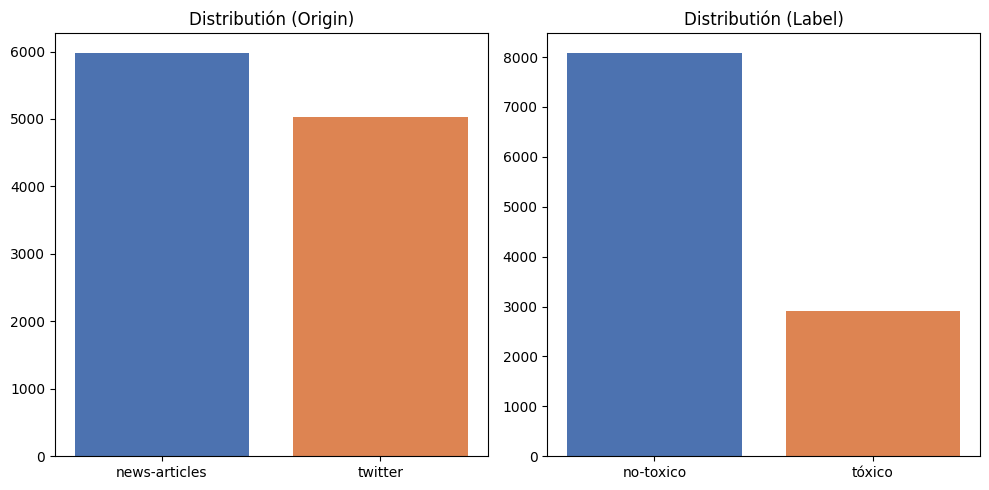

In [17]:
#Distribuciones
language_distribution = df.copy()['origin'].value_counts()
class_distribution = df.copy()['label'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

#origin
axes[0].bar(language_distribution.index, language_distribution.values, color=sns.color_palette("deep"))
axes[0].set_title('Distributi√≥n (Origin)')
axes[1].set_xticks(class_distribution.index)

#label
axes[1].bar(class_distribution.index.map({0: "no-toxico", 1: "t√≥xico"}), class_distribution.values, color=sns.color_palette("deep"))
axes[1].set_title('Distributi√≥n (Label)')
axes[1].set_xticks(class_distribution.index.map({0: "no-toxico", 1: "t√≥xico"}))

plt.tight_layout()
plt.show()

##Longitud

Comprobamos la longitud del texto por tweet en cada label.

Podemos ver una clara relaci√≥n entre la longitud y la toxicidad del texto

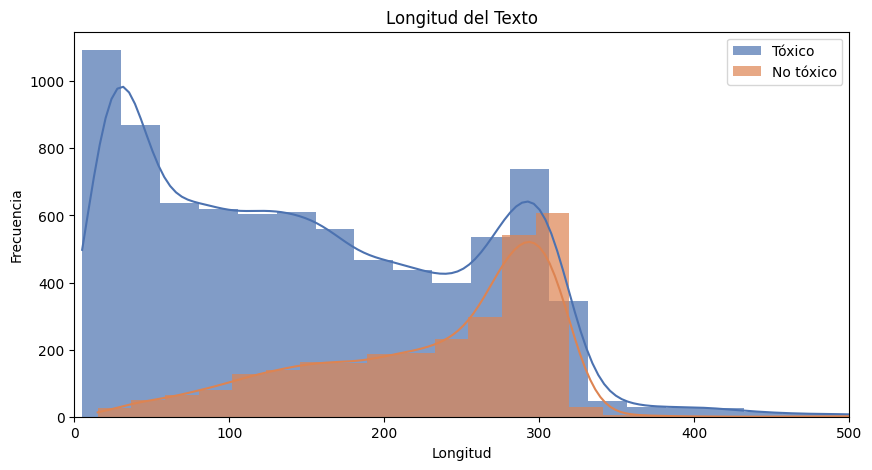

In [18]:
#Longitud de cada label
df_len_label1 = df[df['label'] == 0]['text'].apply(len)
df_len_label2 = df[df['label'] == 1]['text'].apply(len)

#Plot
plt.figure(figsize=(10, 5))
sns.histplot(df_len_label1, bins=30, kde=True, color=sns.color_palette("deep")[0], alpha=0.7, label='T√≥xico', edgecolor='none')
sns.histplot(df_len_label2, bins=30, kde=True, color=sns.color_palette("deep")[1], alpha=0.7, label='No t√≥xico', edgecolor='none')
plt.title('Longitud del Texto')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')
plt.legend()
plt.xlim(0, 500)
plt.show()

##Wordcloud

Analizamos las principales palabras por cada label.

Podemos ver que hace falta preprocesar los textos para que tengan sentido.

Sin embargo, ya podemos notar que en el caso de los textos t√≥xicos hay muchos t√©rminos pol√≠ticos ("S√°nchez", "Podemos", "gobierno", "PSOE"...) con descalificativos ("progre", "mentira").

En los textos no-t√≥xicos tambi√©n tenemos t√©rminos pol√≠ticos, por lo que es posible que el modelo encuentre problemas a la hora de clasificar textos con estos t√©rminos.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


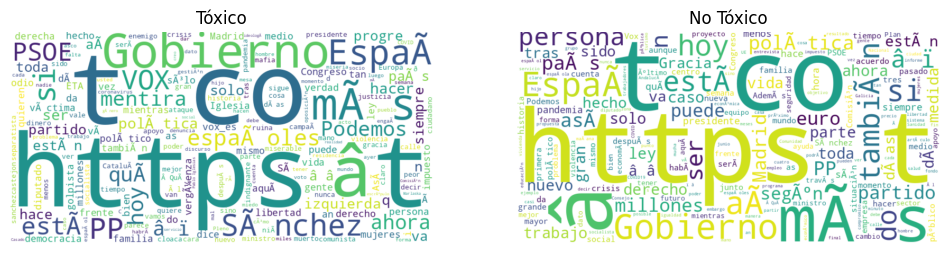

In [19]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

#Wordclouds
stop_words_spanish = set(stopwords.words('spanish'))
toxic_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words_spanish).generate(' '.join(df.copy()[df['label'] == 1]["text"]))
non_toxic_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words_spanish).generate(' '.join(df.copy()[df['label'] == 0]["text"]))

#Plot
plt.figure(figsize=(12, 6))

#Plot toxico
plt.subplot(1, 2, 1)
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.title('T√≥xico')
plt.axis('off')

#Plot no-toxico
plt.subplot(1, 2, 2)
plt.imshow(non_toxic_wordcloud, interpolation='bilinear')
plt.title('No T√≥xico')
plt.axis('off')

plt.show()

##Id

Comprobamos que todos los Id sean urls o tweeterIds

In [20]:
df[~((df['id'].astype(str).str.isdigit()) #N√∫mero (tweetid)
  | (df['id'].str.startswith('http:') #URL
  | df['id'].str.startswith('https:') #URL
  | df['id'].str.contains('.com')) #URL
  | (df['id'].str.match(r'\d+\.\d+e\+\d+')))]['id'] #N√∫mero (tweetid)

Series([], Name: id, dtype: object)

#Preprocessing

##NaN

Convertimos los valores NaN en cadenas de texto vac√≠as para evitar problemas de procesamiento (luego trataremos de corregirlos)

In [21]:
def removeNaN(df):
  """
    Cambia los valores NaN por "".

    Parameters:
    - df: El dataframe a tratar.

    Returns:
    - df: El dataframe resultante.
    """
  df['english'].fillna("", inplace=True)
  df['french'].fillna("", inplace=True)
  return df

In [22]:
removeNaN(df)
df

id  \
0      https://www.elplural.com/politica/espana/polem...   
1                                  1.271010900259078e+18   
2                                 1.2986035925013957e+18   
3                                 1.2811132626507776e+18   
4                                  1.465632198984405e+18   
...                                                  ...   
10995  https://www.newtral.es/coronavirus-covid-casos...   
10996  https://www.newtral.es/centros-salud-comunidad...   
10997  http://www.lavanguardia.com/opinion/20170507/4...   
10998  http://www.vanitatis.elconfidencial.com/notici...   
10999  http://www.lavanguardia.com/opinion/20170507/4...   

                                                    text  label  \
0      Durante su intervenci√É¬≥n, el vicesecretario de...      0   
1      Nueva manipulaci√É¬≥n a la mujer de la @rfef, d√É...      1   
2      SOLIDARIDAD con los 500 trabajadores de Accion...      1   
3      √¢¬ò¬Ä√Ø¬∏¬è #BuenosD√É¬≠as #FelizJueves \n\n  Ma√É¬±ana...      0   
4      Porros o educaci√É¬≥n gratuita.\n\nAdoctrinamien...      1   
...                                                  ...    ...   
10995                                     [PANEL COVID |      0   
10996                      En concreto 10.043, el 76,7%.      0   
10997                                     √¢¬Ä¬ìNo, eso no.      0   
10998                  "Se va para proteger a sus hijos.      0   
10999                     √¢¬Ä¬ìNo podemos decir la verdad.      0   

              origin    id-type  \
0      news-articles        url   
1            twitter  twitterId   
2            twitter  twitterId   
3            twitter  twitterId   
4            twitter  twitterId   
...              ...        ...   
10995  news-articles        url   
10996  news-articles        url   
10997  news-articles        url   
10998  news-articles        url   
10999  news-articles        url   

                                                 english  \
0      Espinosa de los Monteros has compared both pro...   
1      New manipulation of the woman from @rfef, wher...   
2      SOLIDARITY with the 500 Acciona workers facing...   
3      √¢¬ò¬Ä√Ø¬∏¬è #GoodMorning #HappyThursday\n\nTomorrow...   
4      Joints or free education.\n\nProgressive indoc...   
...                                                  ...   
10995                                                      
10996                                                      
10997                                                      
10998                                                      
10999                                                      

                                                  french  
0      Espinosa de los Monteros a compar√© les deux ma...  
1      Nouvelle manipulation de la femme de la @rfef,...  
2      SOLIDARIT√â avec les 500 travailleurs d'Acciona...  
3      √¢¬ò¬Ä√Ø¬∏¬è #Bonjour #JoyeuxJeudi\n\nDemain notre c...  
4      Joints ou √©ducation gratuite.\n\nEndoctrinemen...  
...                                                  ...  
10995                                                     
10996                                                     
10997                                                     
10998                                                     
10999                                                     

[11000 rows x 7 columns]

##UTF-8 Encoding

El texto tiene caracteres extra√±os que parecen indicar que el el encoding utilizado es latin-1 y deber√≠a ser utf-8.

Cambiamos el encoding a utf-8 para mejorar la legibilidad del texto.

In [23]:
def utf8(df):
  """
    Codifica los textos en utf8.

    Parameters:
    - df: El dataframe a tratar.

    Returns:
    - df: El dataframe resultante.
    """
  df['text'] = df['text'].apply(lambda x : x.encode('latin-1', errors='replace').decode('utf-8', errors='replace'))
  df['english'] = df['english'].apply(lambda x : x.encode('latin-1', errors='replace').decode('utf-8', errors='replace'))
  df['french'] = df['french'].apply(lambda x : x.encode('latin-1', errors='replace').decode('utf-8', errors='replace'))
  return df

In [24]:
utf8(df)
df

id  \
0      https://www.elplural.com/politica/espana/polem...   
1                                  1.271010900259078e+18   
2                                 1.2986035925013957e+18   
3                                 1.2811132626507776e+18   
4                                  1.465632198984405e+18   
...                                                  ...   
10995  https://www.newtral.es/coronavirus-covid-casos...   
10996  https://www.newtral.es/centros-salud-comunidad...   
10997  http://www.lavanguardia.com/opinion/20170507/4...   
10998  http://www.vanitatis.elconfidencial.com/notici...   
10999  http://www.lavanguardia.com/opinion/20170507/4...   

                                                    text  label  \
0      Durante su intervenci√≥n, el vicesecretario de ...      0   
1      Nueva manipulaci√≥n a la mujer de la @rfef, d√≥n...      1   
2      SOLIDARIDAD con los 500 trabajadores de Accion...      1   
3      ‚òÄÔ∏è #BuenosD√≠as #FelizJueves \n\n  Ma√±ana nuest...      0   
4      Porros o educaci√≥n gratuita.\n\nAdoctrinamient...      1   
...                                                  ...    ...   
10995                                     [PANEL COVID |      0   
10996                      En concreto 10.043, el 76,7%.      0   
10997                                       ‚ÄìNo, eso no.      0   
10998                  "Se va para proteger a sus hijos.      0   
10999                       ‚ÄìNo podemos decir la verdad.      0   

              origin    id-type  \
0      news-articles        url   
1            twitter  twitterId   
2            twitter  twitterId   
3            twitter  twitterId   
4            twitter  twitterId   
...              ...        ...   
10995  news-articles        url   
10996  news-articles        url   
10997  news-articles        url   
10998  news-articles        url   
10999  news-articles        url   

                                                 english  \
0      Espinosa de los Monteros has compared both pro...   
1      New manipulation of the woman from @rfef, wher...   
2      SOLIDARITY with the 500 Acciona workers facing...   
3      ‚òÄÔ∏è #GoodMorning #HappyThursday\n\nTomorrow our...   
4      Joints or free education.\n\nProgressive indoc...   
...                                                  ...   
10995                                                      
10996                                                      
10997                                                      
10998                                                      
10999                                                      

                                                  french  
0      Espinosa de los Monteros a comparÔøΩ les deux ma...  
1      Nouvelle manipulation de la femme de la @rfef,...  
2      SOLIDARITÔøΩ avec les 500 travailleurs d'Acciona...  
3      ‚òÄÔ∏è #Bonjour #JoyeuxJeudi\n\nDemain notre candi...  
4      Joints ou ÔøΩducation gratuite.\n\nEndoctrinemen...  
...                                                  ...  
10995                                                     
10996                                                     
10997                                                     
10998                                                     
10999                                                     

[11000 rows x 7 columns]

##Links

Eliminamos las urls https://t.co (un wrapper de twitter para urls).

Eliminamos solo estas urls porque otras pueden guardar informaci√≥n √∫til para el modelo.

Tras esto, mostramos de nuevo las wordclouds para visualizar mejor los resultados

In [25]:
import re

def removeLinks(df):
  """
    Elimina urls de tweeter.

    Parameters:
    - df: El dataframe a tratar.

    Returns:
    - df: El dataframe resultante.
    """
  df['text'] = df['text'].apply(lambda x : re.sub(r'https://t.co\S+', '', x))
  df['text'] = df['text'].apply(lambda x : re.sub(r'http://t.co\S+', '', x))
  return df

In [26]:
removeLinks(df)
df

id  \
0      https://www.elplural.com/politica/espana/polem...   
1                                  1.271010900259078e+18   
2                                 1.2986035925013957e+18   
3                                 1.2811132626507776e+18   
4                                  1.465632198984405e+18   
...                                                  ...   
10995  https://www.newtral.es/coronavirus-covid-casos...   
10996  https://www.newtral.es/centros-salud-comunidad...   
10997  http://www.lavanguardia.com/opinion/20170507/4...   
10998  http://www.vanitatis.elconfidencial.com/notici...   
10999  http://www.lavanguardia.com/opinion/20170507/4...   

                                                    text  label  \
0      Durante su intervenci√≥n, el vicesecretario de ...      0   
1      Nueva manipulaci√≥n a la mujer de la @rfef, d√≥n...      1   
2      SOLIDARIDAD con los 500 trabajadores de Accion...      1   
3      ‚òÄÔ∏è #BuenosD√≠as #FelizJueves \n\n  Ma√±ana nuest...      0   
4      Porros o educaci√≥n gratuita.\n\nAdoctrinamient...      1   
...                                                  ...    ...   
10995                                     [PANEL COVID |      0   
10996                      En concreto 10.043, el 76,7%.      0   
10997                                       ‚ÄìNo, eso no.      0   
10998                  "Se va para proteger a sus hijos.      0   
10999                       ‚ÄìNo podemos decir la verdad.      0   

              origin    id-type  \
0      news-articles        url   
1            twitter  twitterId   
2            twitter  twitterId   
3            twitter  twitterId   
4            twitter  twitterId   
...              ...        ...   
10995  news-articles        url   
10996  news-articles        url   
10997  news-articles        url   
10998  news-articles        url   
10999  news-articles        url   

                                                 english  \
0      Espinosa de los Monteros has compared both pro...   
1      New manipulation of the woman from @rfef, wher...   
2      SOLIDARITY with the 500 Acciona workers facing...   
3      ‚òÄÔ∏è #GoodMorning #HappyThursday\n\nTomorrow our...   
4      Joints or free education.\n\nProgressive indoc...   
...                                                  ...   
10995                                                      
10996                                                      
10997                                                      
10998                                                      
10999                                                      

                                                  french  
0      Espinosa de los Monteros a comparÔøΩ les deux ma...  
1      Nouvelle manipulation de la femme de la @rfef,...  
2      SOLIDARITÔøΩ avec les 500 travailleurs d'Acciona...  
3      ‚òÄÔ∏è #Bonjour #JoyeuxJeudi\n\nDemain notre candi...  
4      Joints ou ÔøΩducation gratuite.\n\nEndoctrinemen...  
...                                                  ...  
10995                                                     
10996                                                     
10997                                                     
10998                                                     
10999                                                     

[11000 rows x 7 columns]

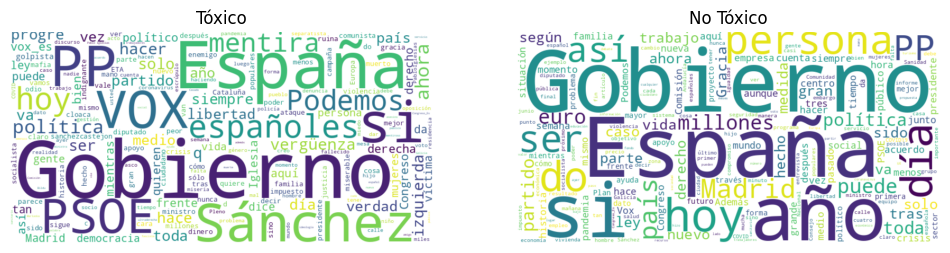

In [27]:
toxic_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words_spanish).generate(' '.join(df.copy()[df['label'] == 1]["text"]))
non_toxic_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words_spanish).generate(' '.join(df.copy()[df['label'] == 0]["text"]))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.title('T√≥xico')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_toxic_wordcloud, interpolation='bilinear')
plt.title('No T√≥xico')
plt.axis('off')

plt.show()

##Emojis

Cambiamos los emojis por su descripci√≥n.

Los modelos de lenguaje suelen haber sido entrenados con emojis por lo que no deber√≠a ser necesario, pero este paso puede mejorar la legibilidad. Adem√°s en en el contexto analizado, los emojis pueden representar cosas que alteren el sentido de la frase (ü§¢) o a√±adir connotaciones pol√≠ticas (üêç)

In [28]:
import emoji

def removeEmoji(df):
  """
    Elimina los emojis.

    Parameters:
    - df: El dataframe a tratar.

    Returns:
    - df: El dataframe resultante.
    """
  df['text'] = df['text'].apply(lambda x: emoji.demojize(x, language='es'))
  df['english'] = df['english'].apply(lambda x: emoji.demojize(x))
  df['french'] = df['french'].apply(lambda x: emoji.demojize(x, language='fr'))
  return df

In [29]:
removeEmoji(df)
df

id  \
0      https://www.elplural.com/politica/espana/polem...   
1                                  1.271010900259078e+18   
2                                 1.2986035925013957e+18   
3                                 1.2811132626507776e+18   
4                                  1.465632198984405e+18   
...                                                  ...   
10995  https://www.newtral.es/coronavirus-covid-casos...   
10996  https://www.newtral.es/centros-salud-comunidad...   
10997  http://www.lavanguardia.com/opinion/20170507/4...   
10998  http://www.vanitatis.elconfidencial.com/notici...   
10999  http://www.lavanguardia.com/opinion/20170507/4...   

                                                    text  label  \
0      Durante su intervenci√≥n, el vicesecretario de ...      0   
1      Nueva manipulaci√≥n a la mujer de la @rfef, d√≥n...      1   
2      SOLIDARIDAD con los 500 trabajadores de Accion...      1   
3      :sol: #BuenosD√≠as #FelizJueves \n\n  Ma√±ana nu...      0   
4      Porros o educaci√≥n gratuita.\n\nAdoctrinamient...      1   
...                                                  ...    ...   
10995                                     [PANEL COVID |      0   
10996                      En concreto 10.043, el 76,7%.      0   
10997                                       ‚ÄìNo, eso no.      0   
10998                  "Se va para proteger a sus hijos.      0   
10999                       ‚ÄìNo podemos decir la verdad.      0   

              origin    id-type  \
0      news-articles        url   
1            twitter  twitterId   
2            twitter  twitterId   
3            twitter  twitterId   
4            twitter  twitterId   
...              ...        ...   
10995  news-articles        url   
10996  news-articles        url   
10997  news-articles        url   
10998  news-articles        url   
10999  news-articles        url   

                                                 english  \
0      Espinosa de los Monteros has compared both pro...   
1      New manipulation of the woman from @rfef, wher...   
2      SOLIDARITY with the 500 Acciona workers facing...   
3      :sun: #GoodMorning #HappyThursday\n\nTomorrow ...   
4      Joints or free education.\n\nProgressive indoc...   
...                                                  ...   
10995                                                      
10996                                                      
10997                                                      
10998                                                      
10999                                                      

                                                  french  
0      Espinosa de los Monteros a comparÔøΩ les deux ma...  
1      Nouvelle manipulation de la femme de la @rfef,...  
2      SOLIDARITÔøΩ avec les 500 travailleurs d'Acciona...  
3      :soleil: #Bonjour #JoyeuxJeudi\n\nDemain notre...  
4      Joints ou ÔøΩducation gratuite.\n\nEndoctrinemen...  
...                                                  ...  
10995                                                     
10996                                                     
10997                                                     
10998                                                     
10999                                                     

[11000 rows x 7 columns]

##Translation

En este paso cambiamos los valores NaN (que hemos convertidos en cadenas de texto vac√≠as) en la correspondiente traducci√≥n.

Para ello utilizaremos la librer√≠a mtranslate (una api de google translate). Utilizamos esta librer√≠a para el preprocesado del set de entrenamiento en este caso. En caso de utilizarlo para un modelo en producci√≥n, ser√≠a necesario asegurarnos de la escalabilidad del modelo (demasiadas request a la api de google translate puede conllevar un baneo) y el mantenimiento del modelo (con google translate no deber√≠a haber problema pero hay apis de traducci√≥n que podr√≠an no estar mantenidos de forma regular).


In [30]:
!pip install mtranslate

  Preparing metadata (setup.py) ... done
  Created wheel for mtranslate: filename=mtranslate-1.8-py3-none-any.whl size=3672 sha256=0d25e1cac6baabacd408e67a5e448da03426e56a011093abbc57f27656d9e830
  Stored in directory: /root/.cache/pip/wheels/c2/04/15/d7654c2c4a9a52e09922967593f3278fed66059be65ca671ea
Successfully built mtranslate


In [31]:
from googletrans import Translator
from mtranslate import translate

def translateDF(df):
  """
    Traduce los campos vac√≠os.

    Parameters:
    - df: El dataframe a tratar.

    Returns:
    - df: El dataframe resultante.
    """
  translator = Translator()
  df['english'] = df.apply(lambda row: translate(row['text'], 'en') if row['english']=="" else row['english'], axis=1)
  df['french'] = df.apply(lambda row: translate(row['text'], 'fr') if row['french']=="" else row['french'], axis=1)
  return df

In [32]:
df = translateDF(df)
df

id  \
0      https://www.elplural.com/politica/espana/polem...   
1                                  1.271010900259078e+18   
2                                 1.2986035925013957e+18   
3                                 1.2811132626507776e+18   
4                                  1.465632198984405e+18   
...                                                  ...   
10995  https://www.newtral.es/coronavirus-covid-casos...   
10996  https://www.newtral.es/centros-salud-comunidad...   
10997  http://www.lavanguardia.com/opinion/20170507/4...   
10998  http://www.vanitatis.elconfidencial.com/notici...   
10999  http://www.lavanguardia.com/opinion/20170507/4...   

                                                    text  label  \
0      Durante su intervenci√≥n, el vicesecretario de ...      0   
1      Nueva manipulaci√≥n a la mujer de la @rfef, d√≥n...      1   
2      SOLIDARIDAD con los 500 trabajadores de Accion...      1   
3      :sol: #BuenosD√≠as #FelizJueves \n\n  Ma√±ana nu...      0   
4      Porros o educaci√≥n gratuita.\n\nAdoctrinamient...      1   
...                                                  ...    ...   
10995                                     [PANEL COVID |      0   
10996                      En concreto 10.043, el 76,7%.      0   
10997                                       ‚ÄìNo, eso no.      0   
10998                  "Se va para proteger a sus hijos.      0   
10999                       ‚ÄìNo podemos decir la verdad.      0   

              origin    id-type  \
0      news-articles        url   
1            twitter  twitterId   
2            twitter  twitterId   
3            twitter  twitterId   
4            twitter  twitterId   
...              ...        ...   
10995  news-articles        url   
10996  news-articles        url   
10997  news-articles        url   
10998  news-articles        url   
10999  news-articles        url   

                                                 english  \
0      Espinosa de los Monteros has compared both pro...   
1      New manipulation of the woman from @rfef, wher...   
2      SOLIDARITY with the 500 Acciona workers facing...   
3      :sun: #GoodMorning #HappyThursday\n\nTomorrow ...   
4      Joints or free education.\n\nProgressive indoc...   
...                                                  ...   
10995                                     [PANEL COVID |   
10996                        Specifically 10,043, 76.7%.   
10997                                     -No, not that.   
10998                "He leaves to protect his children.   
10999                         ‚ÄìWe cannot tell the truth.   

                                                  french  
0      Espinosa de los Monteros a comparÔøΩ les deux ma...  
1      Nouvelle manipulation de la femme de la @rfef,...  
2      SOLIDARITÔøΩ avec les 500 travailleurs d'Acciona...  
3      :soleil: #Bonjour #JoyeuxJeudi\n\nDemain notre...  
4      Joints ou ÔøΩducation gratuite.\n\nEndoctrinemen...  
...                                                  ...  
10995                                   [PANNEAU COVID |  
10996              Plus pr√©cis√©ment 10 043, soit 76,7 %.  
10997                                      -Non, pas √ßa.  
10998                     "Il part prot√©ger ses enfants.  
10999              ‚Äì Nous ne pouvons pas dire la v√©rit√©.  

[11000 rows x 7 columns]

In [33]:
empty_english = df[df['english'] == '']
empty_french = df[df['french'] == '']

print(empty_english)

print(empty_french)

Empty DataFrame
Columns: [id, text, label, origin, id-type, english, french]
Index: []
Empty DataFrame
Columns: [id, text, label, origin, id-type, english, french]
Index: []


##ID

Convertimos las IDs en la palabra del servicio principal (twitter o la correspondiente p√°gina de noticias).

Utilizaremos un sencillo sistema de reglas debido a que con esto funciona en nuestro _dataset_, pero en caso de tener m√°s datos ser√≠a necesario ir mejorando nuestro sistema de reglas para tener en cuenta casos diferentes.

In [69]:
def preprocessID(df):
  """
    Cambia el id por tweeter (si es un numero) o la p√°gina correspondiente (si es una url).

    Parameters:
    - df: El dataframe a tratar.

    Returns:
    - df: El dataframe resultante.
    """
  def change_id(row):
    res = ""
    if ("elpais" in row): #Caso elpais (problemas con el dominio "is.")
      res = row.split('.')[0].replace('https://',"").replace('http://',"")
    elif ("www.alimente." in row): #Caso www.alimente (subdominio especial)
      res = row.split('.')[2].replace('https://',"").replace('http://',"")
    elif ("www." in row) or ("ww." in row) or ("beta." in row) or ("tis." in row) or ("is." in row): #Caso general subdominios
      res = row.split('.')[1].replace('https://',"").replace('http://',"")
    elif row.startswith('http:') or row.startswith('https:') or ('.com' in row): #Caso urls sin subdominio
      res = row.split('.')[0].replace('https://',"").replace('http://',"")
    elif re.match(r'\d+\.\d+e\+\d+', row): #Caso tweeterID
      res = 'tweeter'
    return res

  df['id'] = df["id"].apply(change_id)

  return df

In [85]:
df = preprocessID(df)
df

id                                               text  label  \
0          elplural  Durante su intervenci√≥n, el vicesecretario de ...      0   
1           tweeter  Nueva manipulaci√≥n a la mujer de la @rfef, d√≥n...      1   
2           tweeter  SOLIDARIDAD con los 500 trabajadores de Accion...      1   
3           tweeter  :sol: #BuenosD√≠as #FelizJueves \n\n  Ma√±ana nu...      0   
4           tweeter  Porros o educaci√≥n gratuita.\n\nAdoctrinamient...      1   
...             ...                                                ...    ...   
10995       newtral                                     [PANEL COVID |      0   
10996       newtral                      En concreto 10.043, el 76,7%.      0   
10997  lavanguardia                                       ‚ÄìNo, eso no.      0   
10998     vanitatis                  "Se va para proteger a sus hijos.      0   
10999  lavanguardia                       ‚ÄìNo podemos decir la verdad.      0   

              origin    id-type  \
0      news-articles        url   
1            twitter  twitterId   
2            twitter  twitterId   
3            twitter  twitterId   
4            twitter  twitterId   
...              ...        ...   
10995  news-articles        url   
10996  news-articles        url   
10997  news-articles        url   
10998  news-articles        url   
10999  news-articles        url   

                                                 english  \
0      Espinosa de los Monteros has compared both pro...   
1      New manipulation of the woman from @rfef, wher...   
2      SOLIDARITY with the 500 Acciona workers facing...   
3      :sun: #GoodMorning #HappyThursday\n\nTomorrow ...   
4      Joints or free education.\n\nProgressive indoc...   
...                                                  ...   
10995                                                      
10996                                                      
10997                                                      
10998                                                      
10999                                                      

                                                  french  
0      Espinosa de los Monteros a comparÔøΩ les deux ma...  
1      Nouvelle manipulation de la femme de la @rfef,...  
2      SOLIDARITÔøΩ avec les 500 travailleurs d'Acciona...  
3      :soleil: #Bonjour #JoyeuxJeudi\n\nDemain notre...  
4      Joints ou ÔøΩducation gratuite.\n\nEndoctrinemen...  
...                                                  ...  
10995                                                     
10996                                                     
10997                                                     
10998                                                     
10999                                                     

[11000 rows x 7 columns]

In [86]:
df["id"].unique()

array(['elplural', 'tweeter', 'blogs', 'newtral', 'eldiario',
       'elconfidencial', 'vanitatis', 'lavozdegalicia', 'elsaltodiario',
       'alertadigital', 'elespanol', 'periodistadigital',
       'libertaddigital', 'infolibre', 'ara', 'noticiasdealava',
       'larazon', 'elpais', 'europapress', 'as', 'granadahoy', 'hola',
       'elmundo', 'okdiario', 'kioskoymas', 'nfidencial', 'onfidencial',
       'lavanguardia', 'infosalus', 'dencial', 'confidencial'],
      dtype=object)

Text(0.5, 1.0, 'Origin Distribution')

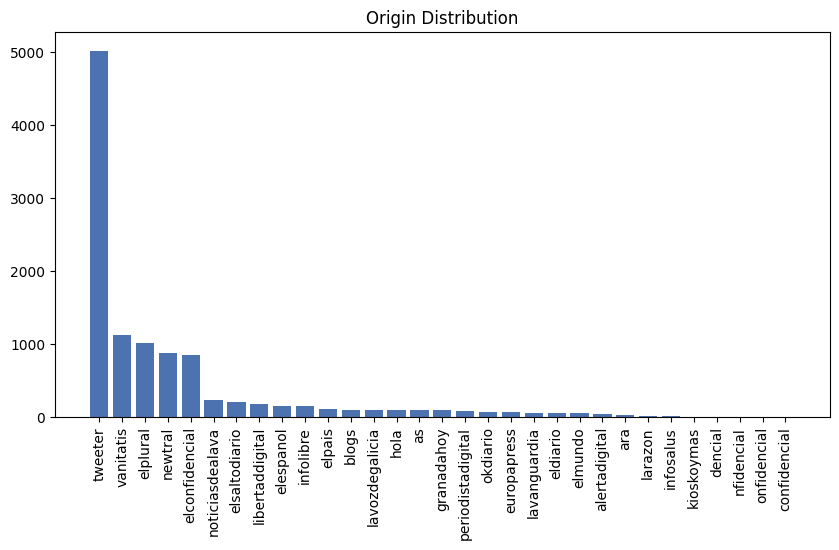

In [87]:
id_distribution = df.copy()['id'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(id_distribution.index, id_distribution.values, color=sns.color_palette("deep")[0])
plt.xticks(rotation='vertical')
plt.title('Origin Distribution')

##Correlaci√≥n de Features

Comprobamos con un modelo de random forest que existe una muy peque√±a correlaci√≥n entre el id y el label.

Despu√©s vamos a asegurar de forma experimental entrenando dos modelos de lenguaje (uno con ID y otro sin ella) si realmente existe esta correlaci√≥n en el modelo final.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Definimos las clases con posible correlacion
df_corr = df.copy()[['id', 'label']]

#Hacemos un one-hot encoding
df_corr = pd.get_dummies(df_corr, columns=['id'], drop_first=True)

#Definimos feature y label
X = df_corr.drop('label', axis=1)
y = df_corr['label']

#Entrenamiento randomForest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

#Resultados
feature_importances = rf_classifier.feature_importances_
feature_importance_dict = dict(zip(X.columns, feature_importances))

print("Feature Importances:\n")
print("Media", feature_importances.mean(),"\n")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")


Feature Importances:

Media 0.03333333333333333 

id_tweeter: 0.707759463419549
id_vanitatis: 0.07587000989552205
id_newtral: 0.054661825482436456
id_elconfidencial: 0.04792113724249581
id_elplural: 0.04185707804033844
id_elsaltodiario: 0.010102862182886106
id_noticiasdealava: 0.00940948508948099
id_elespanol: 0.00776386551697892
id_infolibre: 0.006695266292595926
id_libertaddigital: 0.005104876303144608
id_okdiario: 0.004342806035022366
id_as: 0.0042399031668127985
id_blogs: 0.0038649397988761883
id_elpais: 0.003495115929696744
id_hola: 0.0027697601866130918
id_lavozdegalicia: 0.002717413357432256
id_europapress: 0.002318052762481912
id_granadahoy: 0.00197580939410592
id_eldiario: 0.0017488095744748109
id_lavanguardia: 0.0017310710912435913
id_periodistadigital: 0.0015347115975700772
id_elmundo: 0.0009542115154598974
id_larazon: 0.0005770124634880498
id_ara: 0.0003047214953212277
id_infosalus: 0.00013522598323194437
id_kioskoymas: 0.00010003485866454058
id_dencial: 2.0828742297397246e

##ID $\to$ Text

A√±adimos la ID al texto para comprobar si realmente este pudiese contener informaci√≥n √∫til para el modelo durante el entrenamiento (por ejemplo, hay medios que podr√≠an contener m√°s textos t√≥xicos que otros).

In [70]:
def applyID(df):
  """
    Aplica el ID a la columna de texto.

    Parameters:
    - df: El dataframe a tratar.

    Returns:
    - df: El dataframe resultante.
    """
  df['text'] = "[" + df['id'] + "] " + df['text']
  df['english'] = "[" + df['id'] + "] " + df['english']
  df['french'] = "[" + df['id'] + "] " + df['french']
  return df

In [89]:
df = applyID(df)
df

id                                               text  label  \
0          elplural  [elplural] Durante su intervenci√≥n, el vicesec...      0   
1           tweeter  [tweeter] Nueva manipulaci√≥n a la mujer de la ...      1   
2           tweeter  [tweeter] SOLIDARIDAD con los 500 trabajadores...      1   
3           tweeter  [tweeter] :sol: #BuenosD√≠as #FelizJueves \n\n ...      0   
4           tweeter  [tweeter] Porros o educaci√≥n gratuita.\n\nAdoc...      1   
...             ...                                                ...    ...   
10995       newtral                           [newtral] [PANEL COVID |      0   
10996       newtral            [newtral] En concreto 10.043, el 76,7%.      0   
10997  lavanguardia                        [lavanguardia] ‚ÄìNo, eso no.      0   
10998     vanitatis      [vanitatis] "Se va para proteger a sus hijos.      0   
10999  lavanguardia        [lavanguardia] ‚ÄìNo podemos decir la verdad.      0   

              origin    id-type  \
0      news-articles        url   
1            twitter  twitterId   
2            twitter  twitterId   
3            twitter  twitterId   
4            twitter  twitterId   
...              ...        ...   
10995  news-articles        url   
10996  news-articles        url   
10997  news-articles        url   
10998  news-articles        url   
10999  news-articles        url   

                                                 english  \
0      [elplural] Espinosa de los Monteros has compar...   
1      [tweeter] New manipulation of the woman from @...   
2      [tweeter] SOLIDARITY with the 500 Acciona work...   
3      [tweeter] :sun: #GoodMorning #HappyThursday\n\...   
4      [tweeter] Joints or free education.\n\nProgres...   
...                                                  ...   
10995                                         [newtral]    
10996                                         [newtral]    
10997                                    [lavanguardia]    
10998                                       [vanitatis]    
10999                                    [lavanguardia]    

                                                  french  
0      [elplural] Espinosa de los Monteros a comparÔøΩ ...  
1      [tweeter] Nouvelle manipulation de la femme de...  
2      [tweeter] SOLIDARITÔøΩ avec les 500 travailleurs...  
3      [tweeter] :soleil: #Bonjour #JoyeuxJeudi\n\nDe...  
4      [tweeter] Joints ou ÔøΩducation gratuite.\n\nEnd...  
...                                                  ...  
10995                                         [newtral]   
10996                                         [newtral]   
10997                                    [lavanguardia]   
10998                                       [vanitatis]   
10999                                    [lavanguardia]   

[11000 rows x 7 columns]

#Model Training Pipeline

Definimos la pipeline para entrenar modelos.

Utilizaremos un subset del entrenamiento como evaluaci√≥n para evitar la fuga de datos, de forma que el test se utilize solo al final para evaluar de forma imparcial.

##Setup

In [34]:
!pip install transformers
!pip install transformers[torch]
!pip install accelerate>=0.20.1

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.9/7.9 MB 30.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 311.2/311.2 kB 37.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.8/3.8 MB 78.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 74.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 261.4/261.4 kB 6.7 MB/s eta 0:00:00


In [35]:
import torch
from torch.utils.data import Dataset
from transformers import AutoTokenizer,AutoModelForSequenceClassification
from transformers import Trainer,TrainingArguments

In [36]:
#Utilizamos un modelo multilingue
model_name  = 'bert-base-multilingual-uncased'

In [37]:
#Definimos el tokenizador
tokenizer = AutoTokenizer.from_pretrained(model_name)

(‚Ä¶)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(‚Ä¶)lingual-uncased/resolve/main/config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

(‚Ä¶)tilingual-uncased/resolve/main/vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

(‚Ä¶)gual-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

In [38]:
#Creamos un dataframe con los campos necesarios para el entrenamiento
df_pre = pd.concat([
    df[['text', 'label']],
    df[['english', 'label']].rename(columns={'english': 'text'}),
    df[['french', 'label']].rename(columns={'french': 'text'})
], ignore_index=True)

#Eliminamos campos vacios (en caso de haberlos)
df_pre = df_pre[df_pre['text'] != '']

df_pre

text  label
0      Durante su intervenci√≥n, el vicesecretario de ...      0
1      Nueva manipulaci√≥n a la mujer de la @rfef, d√≥n...      1
2      SOLIDARIDAD con los 500 trabajadores de Accion...      1
3      :sol: #BuenosD√≠as #FelizJueves \n\n  Ma√±ana nu...      0
4      Porros o educaci√≥n gratuita.\n\nAdoctrinamient...      1
...                                                  ...    ...
32995                                   [PANNEAU COVID |      0
32996              Plus pr√©cis√©ment 10 043, soit 76,7 %.      0
32997                                      -Non, pas √ßa.      0
32998                     "Il part prot√©ger ses enfants.      0
32999              ‚Äì Nous ne pouvons pas dire la v√©rit√©.      0

[33000 rows x 2 columns]

In [39]:
from sklearn.model_selection import train_test_split

#Definimos la feature y el label
X = df_pre["text"]
y = df_pre["label"]

#Definimos un set de evaluaci√≥n
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.1, random_state=0, shuffle=True)

print("X_train", len(X_train), "| X_eval:", len(X_eval), "| y_train:", len(y_train), "| y_eval:", len(y_eval))
print("\n\n")
print(X_train)
print("\n\n")
print(X_eval)
print("\n\n")
print(y_train, )
print("\n\n")
print(y_eval)

X_train 29700 | X_eval: 3300 | y_train: 29700 | y_eval: 3300



8383     BOE | As√≠ ser√° la nueva tarifa de √∫ltimo recur...
20798    Asked about her vote in the regional elections...
27918    Ce sont 475 836 de plus par rapport au dernier...
5808     Iluminador en tono Pure Gold de la gama Synchr...
10906                       Un look de inspiraci√≥n Hepburn
                               ...                        
20757                         Narration of a soccer match.
32103                      "Cela allume une lumi√®re jaune.
30403    Selon les explications fournies, les rapports ...
21243                 Is there no more informational life?
2732       El pr√≥ximo lunes 15 de junio, a partir de la...
Name: text, Length: 29700, dtype: object



11609    In the end, he presented some of the dishes he...
7564     La #SentenciaERE es demoledora para el PSOE: 1...
18998    For those of us who carry Toledo in our hearts...
13504    The @parlamentoNA and the Platform of Social E...
1

In [40]:
#Encodeamos los textos
train_encodings = tokenizer(X_train.values.tolist(), truncation=True, padding=True, return_tensors = 'pt')
val_encodings = tokenizer(X_eval.values.tolist(), truncation=True, padding=True, return_tensors = 'pt')

In [45]:
#Dataset train
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

#Dataset test
class SentimentTestDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        return item
    def __len__(self):
        return len(self.encodings)

In [46]:
#Creamos los datasets
train_dataset = SentimentDataset(train_encodings, y_train.values.tolist())
val_dataset = SentimentDataset(val_encodings, y_eval.values.tolist())

In [47]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

#Funcion para mostrar las m√©tricas del modelo durante el entrenamiento
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(labels, pred, average='weighted')

    return {"accuracy":accuracy,"recall":recall,"precision":precision,"f1_score":f1}

In [48]:
#Argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./res',
    evaluation_strategy="steps",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs4',
    load_best_model_at_end=True,
)

In [49]:
#Vaciamos el cache de cuda (ayuda con la memoria)
torch.cuda.empty_cache()

##Entrenamiento del Modelo

In [50]:
#Definimos el modelo
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

#Entrenamos el modelo
trainer.train()

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-45-1cd71f6f445e>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


<ipython-input-45-1cd71f6f445e>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-45-1cd71f6f445e>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-45-1cd71f6f445e>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-45-1cd71f6f445e>:7: UserWarning: To copy construct from a 

TrainOutput(global_step=5571, training_loss=0.19405907759480706, metrics={'train_runtime': 3511.1874, 'train_samples_per_second': 25.376, 'train_steps_per_second': 1.587, 'total_flos': 2.3443195032576e+16, 'train_loss': 0.19405907759480706, 'epoch': 3.0})

##Comparativa de modelos

Utilizaremos de preprocesado+ID ya que mejora el rendimiento del que utiliza solo preprocesado durante el entrenamiento y que el tiempo que requiere no es mucho mayor.

Utilizamos como m√©trica de comparativa el F1-score ya que esta funciona mejor en _datasets_ desbalanceados al lograr un balance entre el precision y el recall.

bert-base-multilingual-cased preprocesado

| Step | Training Loss | Validation Loss | Accuracy | Recall | Precision | F1 Score |
|------|---------------|------------------|----------|--------|-----------|----------|
| 500  | 0.378600      | 0.263632         | 0.901212 | 0.839041 | 0.798913 | 0.901970 |
| 1000 | 0.297100      | 0.276925         | 0.903636 | 0.755708 | 0.864230 | 0.901478 |
| 1500 | 0.262600      | 0.245564         | 0.920000 | 0.810502 | 0.878713 | 0.918938 |
| 2000 | 0.229100      | 0.253833         | 0.922424 | 0.818493 | 0.880835 | 0.921491 |
| 2500 | 0.179700      | 0.265008         | 0.911515 | 0.924658 | 0.781853 | 0.913707 |
| 3000 | 0.193600      | 0.255682         | 0.928788 | 0.843607 | 0.882915 | 0.928261 |
| 3500 | 0.168700      | 0.223584         | 0.940303 | 0.874429 | 0.898007 | 0.940047 |
| 4000 | 0.134800      | 0.221212         | 0.942727 | 0.915525 | 0.874591 | 0.943138 |
| 4500 | 0.105000      | 0.253095         | 0.940303 | 0.906393 | 0.873487 | 0.940650 |
| 5000 | 0.096500      | 0.240935         | 0.942424 | 0.878995 | 0.901639 | 0.942188 |
| 5500 | 0.103400      | 0.225163         | 0.943333 | 0.860731 | 0.920635 | 0.942710 |


</br></br>

bert-base-multilingual-cased preprocesado+id

| Step | Training Loss | Validation Loss | Accuracy | Recall | Precision | F1 Score |
|------|---------------|------------------|----------|--------|-----------|----------|
| 500  | 0.374300      | 0.256359         | 0.895152 | 0.886986 | 0.758789 | 0.897584 |
| 1000 | 0.290800      | 0.270116         | 0.913939 | 0.859589 | 0.823851 | 0.914513 |
| 1500 | 0.256300      | 0.227175         | 0.918182 | 0.819635 | 0.865060 | 0.917463 |
| 2000 | 0.229100      | 0.253776         | 0.928182 | 0.844749 | 0.879905 | 0.927707 |
| 2500 | 0.171600      | 0.250610         | 0.924242 | 0.899543 | 0.829474 | 0.925190 |
| 3000 | 0.176300      | 0.292962         | 0.927273 | 0.803653 | 0.911917 | 0.925742 |
| 3500 | 0.158200      | 0.241910         | 0.941515 | 0.878995 | 0.898483 | 0.941309 |
| 4000 | 0.127800      | 0.255043         | 0.937273 | 0.899543 | 0.868798 | 0.937616 |
| 4500 | 0.087900      | 0.256165         | 0.945152 | 0.889269 | 0.902665 | 0.945020 |
| 5000 | 0.091500      | 0.244081         | 0.945152 | 0.877854 | 0.912218 | 0.944810 |
| 5500 | 0.086300      | 0.248155         | 0.943333 | 0.859589 | 0.921665 | 0.942687 |





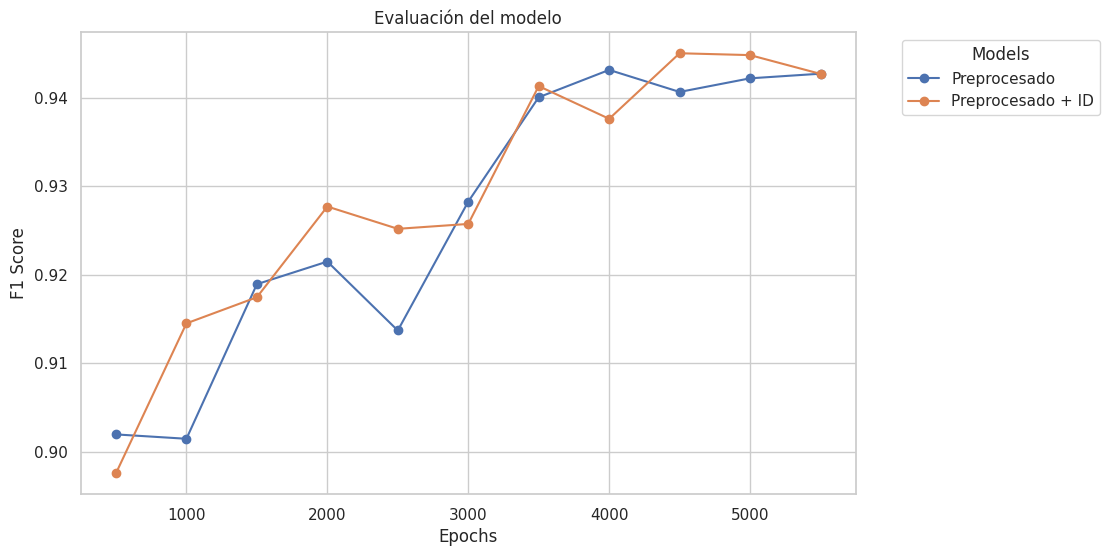

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data_bert_preprocesado = {
    'Step': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500],
    'Training Loss': [0.3786, 0.2971, 0.2626, 0.2291, 0.1797, 0.1936, 0.1687, 0.1348, 0.105, 0.0965, 0.1034],
    'Validation Loss': [0.263632, 0.276925, 0.245564, 0.253833, 0.265008, 0.255682, 0.223584, 0.221212, 0.253095, 0.240935, 0.225163],
    'Accuracy': [0.901212, 0.903636, 0.92, 0.922424, 0.911515, 0.928788, 0.940303, 0.942727, 0.940303, 0.942424, 0.943333],
    'Recall': [0.839041, 0.755708, 0.810502, 0.818493, 0.924658, 0.843607, 0.874429, 0.915525, 0.906393, 0.878995, 0.860731],
    'Precision': [0.798913, 0.86423, 0.878713, 0.880835, 0.781853, 0.882915, 0.898007, 0.874591, 0.873487, 0.901639, 0.920635],
    'F1 Score': [0.90197, 0.901478, 0.918938, 0.921491, 0.913707, 0.928261, 0.940047, 0.943138, 0.94065, 0.942188, 0.94271]
}

data_bert_preprocesado_id = {
    'Step': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500],
    'Training Loss': [0.3743, 0.2908, 0.2563, 0.2291, 0.1716, 0.1763, 0.1582, 0.1278, 0.0879, 0.0915, 0.0863],
    'Validation Loss': [0.256359, 0.270116, 0.227175, 0.253776, 0.25061, 0.292962, 0.24191, 0.255043, 0.256165, 0.244081, 0.248155],
    'Accuracy': [0.895152, 0.913939, 0.918182, 0.928182, 0.924242, 0.927273, 0.941515, 0.937273, 0.945152, 0.945152, 0.943333],
    'Recall': [0.886986, 0.859589, 0.819635, 0.844749, 0.899543, 0.803653, 0.878995, 0.899543, 0.889269, 0.877854, 0.859589],
    'Precision': [0.758789, 0.823851, 0.86506, 0.879905, 0.829474, 0.911917, 0.898483, 0.868798, 0.902665, 0.912218, 0.921665],
    'F1 Score': [0.897584, 0.914513, 0.917463, 0.927707, 0.92519, 0.925742, 0.941309, 0.937616, 0.94502, 0.94481, 0.942687]
}

# Create DataFrames
df_bert_preprocesado = pd.DataFrame(data_bert_preprocesado)
df_bert_preprocesado_id = pd.DataFrame(data_bert_preprocesado_id)


sns.set(style="whitegrid", palette=sns.color_palette("deep"))
color_cycle = iter(sns.color_palette("deep"))
plt.figure(figsize=(10, 6))

models = ["Preprocesado", "Preprocesado + ID"]
for count, model in enumerate([data_bert_preprocesado, data_bert_preprocesado_id]):
    color = next(color_cycle)
    plt.plot(model["Step"], model["F1 Score"], marker='o', label=models[count], color=color)

#plt.ylim(0.9, 0.93)

plt.title('Evaluaci√≥n del modelo')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#Testing

##Preprocesado

Preprocesamos el set de test como hicimos con el de entrenamiento

In [71]:
def preprocessDF(df):
  """
    Aplicamos todos los pasos para el preprocesado del test dataset.

    Parameters:
    - df: El dataframe a tratar.

    Returns:
    - df: El dataframe resultante.
    """
  df = removeNaN(df)
  df = utf8(df)
  df = removeLinks(df)
  df = removeEmoji(df)
  df = preprocessID(df)
  df = applyID(df)
  return df

In [72]:
df_test = preprocessDF(df_test)
df_test

id                                               text  label  \
0           newtral  [newtral] El ensayo con los espa?oles en el ex...      0   
1           tweeter  [tweeter] Hoy a las 20:20 os espero en el prog...      0   
2           maldita  [maldita] Adem?s de la diferencia de salarios,...      0   
3     alertadigital  [alertadigital] ?Por qu? si se grab? en Gij?n,...      0   
4           tweeter  [tweeter] Ha sido un placer entregar a @jonkor...      0   
...             ...                                                ...    ...   
4995        tweeter  [tweeter] Hoy me he levantado un poco m?s temp...      0   
4996          marca  [marca] Y la conclusi?n del informe es rotunda...      0   
4997        tweeter  [tweeter] #Cantabria solo avanza de la mano de...      0   
4998         xataka  [xataka] Por otro lado, este modelo incorpora ...      0   
4999        elmundo  [elmundo] En los pr?ximos meses se espera la r...      0   

             origin    id-type  \
0     news-articles        url   
1           twitter  twitterId   
2     news-articles        url   
3     news-articles        url   
4           twitter  twitterId   
...             ...        ...   
4995        twitter  twitterId   
4996  news-articles        url   
4997        twitter  twitterId   
4998  news-articles        url   
4999  news-articles        url   

                                                english  \
0     [newtral] The common denominator in the expert...   
1     [tweeter] Today at 20:20 I'll be waiting for y...   
2     [maldita] "Worked hours are a homogeneous data...   
3     [alertadigital] We didn't understand it at tha...   
4     [tweeter] It has been a pleasure to present @j...   
...                                                 ...   
4995  [tweeter] Today I woke up a little earlier for...   
4996  [marca] And the conclusion of the report is cl...   
4997  [tweeter] Cantabria only moves forward hand in...   
4998  [xataka] On the other hand, this model incorpo...   
4999  [elmundo] In the coming months, the revaluatio...   

                                                 french  
0     [newtral] Le d?nominateur commun dans l'opinio...  
1     [tweeter] Aujourd'hui ? 20h20, je vous attends...  
2     [maldita] "Les heures travaill?es sont une don...  
3     [alertadigital] Nous ne l'avons pas compris ? ...  
4     [tweeter] Cela a ?t? un plaisir de remettre ? ...  
...                                                 ...  
4995  [tweeter] Aujourd'hui, je me suis lev? un peu ...  
4996  [marca] Et la conclusion du rapport est sans ?...  
4997  [tweeter] La Cantabrie avance seulement de la ...  
4998  [xataka] D'autre part, ce mod?le int?gre un sy...  
4999  [elmundo] Dans les mois ? venir, on s'attend ?...  

[5000 rows x 7 columns]

In [73]:
#A√±adimos todos los lenguajes a la columna "text"
df_test_pre = pd.concat([
    df_test[['text', 'label']],
    df_test[['english', 'label']].rename(columns={'english': 'text'}),
    df_test[['french', 'label']].rename(columns={'french': 'text'})
], ignore_index=True)

df_test_pre

text  label
0      [newtral] El ensayo con los espa?oles en el ex...      0
1      [tweeter] Hoy a las 20:20 os espero en el prog...      0
2      [maldita] Adem?s de la diferencia de salarios,...      0
3      [alertadigital] ?Por qu? si se grab? en Gij?n,...      0
4      [tweeter] Ha sido un placer entregar a @jonkor...      0
...                                                  ...    ...
14995  [tweeter] Aujourd'hui, je me suis lev? un peu ...      0
14996  [marca] Et la conclusion du rapport est sans ?...      0
14997  [tweeter] La Cantabrie avance seulement de la ...      0
14998  [xataka] D'autre part, ce mod?le int?gre un sy...      0
14999  [elmundo] Dans les mois ? venir, on s'attend ?...      0

[15000 rows x 2 columns]

In [74]:
#Df con solo el texto
df_test_text = df_test_pre.copy().drop("label", axis=1)
df_test_text

text
0      [newtral] El ensayo con los espa?oles en el ex...
1      [tweeter] Hoy a las 20:20 os espero en el prog...
2      [maldita] Adem?s de la diferencia de salarios,...
3      [alertadigital] ?Por qu? si se grab? en Gij?n,...
4      [tweeter] Ha sido un placer entregar a @jonkor...
...                                                  ...
14995  [tweeter] Aujourd'hui, je me suis lev? un peu ...
14996  [marca] Et la conclusion du rapport est sans ?...
14997  [tweeter] La Cantabrie avance seulement de la ...
14998  [xataka] D'autre part, ce mod?le int?gre un sy...
14999  [elmundo] Dans les mois ? venir, on s'attend ?...

[15000 rows x 1 columns]

##Predicciones

Hacemos las predicciones con el set de test

In [67]:
#Encodeamos los textos y definimos el dataset
test_encodings = tokenizer([i[0] for i in df_test_text.values.tolist()], truncation=True, padding=True, return_tensors = 'pt')#.to("cuda")
test_labels = [1 for i in df_test_text.values.tolist()] #La inicializacion de los labels es arbitrarea
test_dataset = SentimentDataset(test_encodings, test_labels)

In [68]:
#Predecimos usando el modelo
preds = trainer.predict(test_dataset=test_dataset)
pred_labels = np.argmax(preds.predictions, axis=1)

pred_labels

<ipython-input-45-1cd71f6f445e>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


array([1, 0, 0, ..., 0, 0, 1])

#An√°lisis de Errores

##M√©tricas Principales

Podemos ver que el modelo tiene un problema a la hora de detectar falsos positivos en la clase "t√≥xico".
Esto se refleja claramente en la baja precisi√≥n de la clase "t√≥xico" (que se traduce en su f1-score al haber un desbalance entre la precisi√≥n y el recall de la clase).

La clase "no-t√≥xico", en cambio, parece tener mejores m√©tricas, aunque sin duda hay un espacio de mejora, especialmente en el recall.

In [163]:
from sklearn.metrics import classification_report

print(classification_report(df_test_pre['label'], pred_labels))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     12924
           1       0.33      0.84      0.48      2076

    accuracy                           0.75     15000
   macro avg       0.65      0.78      0.65     15000
weighted avg       0.88      0.75      0.78     15000



##ROC

En primer lugar podemos ver que la curva ROC est√° bastante por encima de la funci√≥n $x=y$, y que el valor AUC es bastante bueno (0.87), por lo que parece que el modelo tiene una decente capacidad de discriminaci√≥n.

Sin embargo, la pendiente de la curva ROC no es demasiado empinada, por lo que existe mucho rango de mejora.

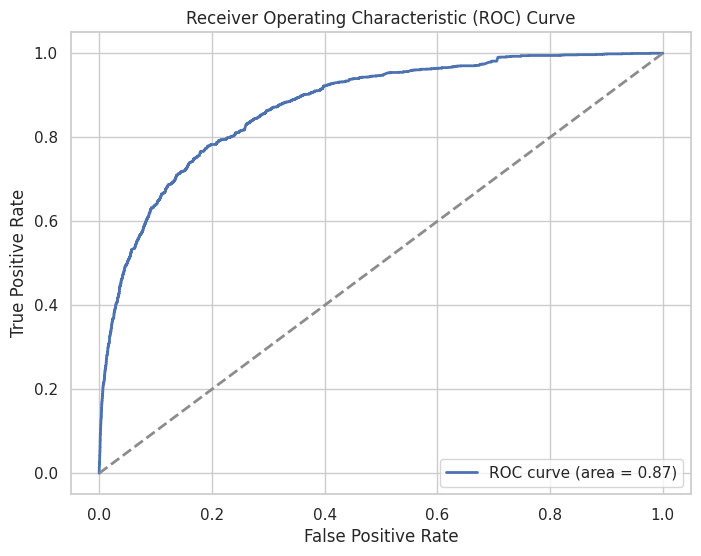

In [143]:
from scipy.special import softmax

#ROC y AUC
probabilities = softmax(preds.predictions, axis=1)[:, 1] #Usamos softmax para calcular las "probabilidades" del modelo
roc_auc = roc_auc_score(df_test_pre["label"], probabilities)
fpr, tpr, _ = roc_curve(df_test_pre["label"], probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc), color=sns.color_palette("deep")[0])
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', color=sns.color_palette("deep")[7])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##Matriz de Confusi√≥n

Confirmamos que el problema del modelo es con falsos positivos, por lo que el modelo tiende a calificar como t√≥xicos muchos mensajes que en realidad no son t√≥xicos.

Si implement√°ramos nuestro modelo en producci√≥n, ser√≠a necesario tener esto en cuenta. En nuestro caso de detecci√≥n de toxicidad es mucho mejor tener un falso positivo que un falso negativo (ya que es mucho peor no detectar un mensaje que realmente s√≠ es t√≥xico).

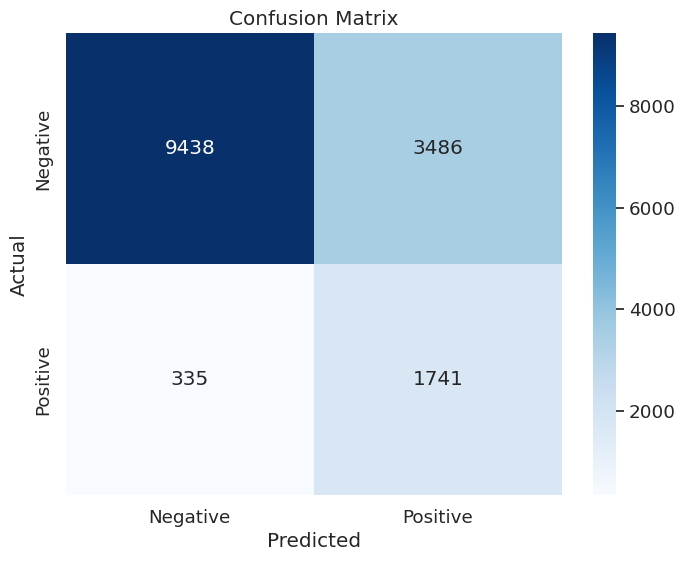

In [133]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Matriz de confusi√≥n
conf_mat = confusion_matrix(df_test_pre["label"], pred_labels)

#Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##WordCloud

Analizando el wordcloud en los casos donde el modelo falla, podemos ver que en el caso de los falsos positivos, hay un lenguaje muy parecido al que encontrabamos en el wordcloud de textos t√≥xicos del set de entrenamiento ("S√°nchez", "PP", "gobierno", "PSOE"...)
Es muy posible que esto sea parte de la causa de por qu√© el modelo falla en esos casos.

Podemos ver que la palabra mayoritaria en ambos textos es "tweeter". Sin embargo, esto se debe, principalmente a que es la palabra m√°s repetida en el dataset (ya que hemos introducido las ids dentro del modelo), por lo que no nos da mucha informaci√≥n.

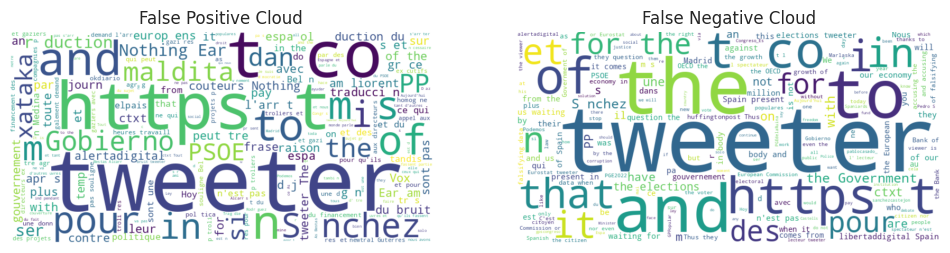

In [172]:
#√çndices de falsos positivos
false_positive_indices = np.where((pred_labels == 1) & (df_test_pre["label"] == 0))[0]
false_negative_indices = np.where((pred_labels == 0) & (df_test_pre["label"] == 1))[0]

#√çndices de falsos ngativos
false_positive_text = ' '.join(df_test_pre["text"].iloc[false_positive_indices])
false_negative_text = ' '.join(df_test_pre["text"].iloc[false_negative_indices])

#Wordclouds
false_positive_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words_spanish).generate(false_positive_text)
false_negative_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words_spanish).generate(false_negative_text)

#Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(false_positive_wordcloud, interpolation='bilinear')
plt.title('False Positive Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(false_negative_wordcloud, interpolation='bilinear')
plt.title('False Negative Cloud')
plt.axis('off')

plt.show()


##Muestreo

Con un sencillo muestreo de los casos de error del modelo, podemos ver que
- Los falsos positivos tienden a ser mensajes que no son t√≥xicos pero tienen a veces un tono controversial o cr√≠tico dentro de contextos polarizados (como la pol√≠tica).
- Los falsos negativos son mayoritariamente mensajes con lenguaje sutilmente t√≥xico o ir√≥nico.
- En general la mayor√≠a de textos muestreados son pol√≠ticos (lo cual tiene sentido ya que en estos textos parece ser donde hay m√°s toxicidad en general)

In [177]:
false_positive_indices = df_test_pre[(df_test_pre['label'] == 0) & (pred_labels == 1)].index
false_negative_indices = df_test_pre[(df_test_pre['label'] == 1) & (pred_labels == 0)].index

print("False Positives:")
for index in false_positive_indices[:10]:
    print(f"- {df_test_pre['text'][index]}")

print("\nFalse Negatives:")
for index in false_negative_indices[:10]:
    print(f"- {df_test_pre['text'][index]}")

False Positives:
- [newtral] El ensayo con los espa?oles en el extranjero ser?a la ruta del voto por internet
- [alertadigital] ?Por qu? si se grab? en Gij?n, aparece a?os despu?s en otro lugar?
- [alertadigital] ?No pueden vendernos esta hip?tesis?
- [tweeter] La energ?a solar y la e?lica son cada vez m?s baratas y vapulean en costes al carb?n, el gas y la nuclear. 
- [tweeter] La pol?tica debe recuperar su protagonismo. Es el momento de enfatizar los consensos y aceptar sin miedo los disensos. Mesa de di?logo, reforma penal y libertad para los presos. 
- [tweeter] Dar cobertura medi?tica a un grupo inicialmente residual llamado vox nos ha salido estupendo. ?Q puede salir mal si le damos el micr?fono a una nazi? 

A estas alturas del partido ya tendr?amos q haber aprendido. Es exasperante
- [tweeter] Hoy va a ser un d?a hist?rico. De camino al Consejo de Ministras y Ministros que aprobar? la Ley Trans y de igualdad LGTBI. #EsLey:bandera_transg?nero::bandera_del_arco?ris::pu?o_en_alto_

#Posibles Mejoras

Por falta de tiempo o recursos, hay diferentes aproximaciones que no se han podido tratar pero que podr√≠an haber ayudado a mejorar el modelo
- Hacer aumento de datos (_back translation_, cambio de sin√≥nimos o el uso de alg√∫n modelo de lenguaje adaptado). Esto podr√≠a ayudar a mejorar el rendimiento del modelo y hacerlo m√°s robusto, especialmente si se aumentan los datos de la clase minoritaria.
- Entrenar con m√°s modelos de lenguaje y evaluar cual es el rendimiento de cada uno.

#Pregunta
Si tuvieses acceso a un LLMs (ChatGPT, LLaMa, etc, ¬øLo usar√≠as? En caso afirmativo
desarrolla la respuesta (puedes dejar la respuesta a esta pregunta en una celda del
notebook)

Depende de cual sea el objetivo del proyecto. Aunque es verdad que el uso de un LLM casi seguro mejorar√≠a los resultados del modelo, es posible que el coste de utilizar un LLM sea mayor que el beneficio que logremos en los resultados.

Ser√≠a necesario analizar
- El coste del LLM frente a nuestro modelo de bert (especialmente si el LLM es utilizado durante la inferencia en un modelo cuyo n√∫mero de usuarios puede crecer).
- Los recursos de los que dispone nuestra empresa.
- El tiempo del que disponemos (a nivel de entrenamiento y de inferencia).
- La importancia de los resultados (hay tareas en las que no es tan preocupante fallar).
- La diferencia de resultados (es posible que en nuestro problema concreto no mejore tanto el resultado).
- La escalabilidad de nuestro modelo, especialmente si usamos un servicio como la API de chatgpt que cobra por n√∫mero de tokens.

En base a lo visto, en el modelo lo m√°s probable es que el coste del LLM sea mucho mayor a los beneficios que logremos. Posiblemente ser√≠a mejor el uso del LLM para generar nuevos datos de entrenamiento o aumentar los disponibles mediante el uso de un buen _prompt_ que utilice los datos que ya tenemos ‚Äîya sea para etiquetar texto del que dispongamos o para generarlo‚Äî.

Ahora bien, si la tarea de nuestro modelo requiere una gran precisi√≥n y disponemos de los recursos necesarios, es posible que merezca la pena implementar un LLM como base de nuestro modelo, ya sea utilizando _prompt engineering_, una t√©cnica adaptativa como LoRA o un _fine-tuning_ del modelo (en orden creciente de coste y exactitud).